In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [43]:
cols = ["fLenght", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "FM3Long", "fM3Trans","fAlpha","fDist","class"]
df_source = "magic04.data"
df = pd.read_csv(df_source,names=cols)
df.head()

fLenght    fWidth   fSize   fConc  fConc1     fAsym  FM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

Now , that we have data in the way we want , we know what we have to design the ml to do,

We will start the classification

i.e, g or h

which we have converted into 1 and 0
```
pd.read_csv(file) # this will output the file
```

if the columns are not named in the data

we first define the colunms name and create a list of columns

then

```
cols = []

df = pd.read_csv(file,names=cols)

df.head() # this is will give the first five samples of the data
```
```
df[colunn_name].unique() #this gives all the unique items in the given column

df[column_name] = (df[column_name]=="g").astype(int) # Now we will iterate through all the items in the column and if the condition is satisfied we will now assign 1 in place of "g" and 0 if it's not true
```

In [44]:
cols = ["fLenght", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "FM3Long", "fM3Trans","fAlpha","fDist","class"]
df_source = "magic04.data"
df = pd.read_csv(df_source,names=cols)
df.head()

fLenght    fWidth   fSize   fConc  fConc1     fAsym  FM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [45]:
df["class"] = (df["class"]=='g').astype(int)

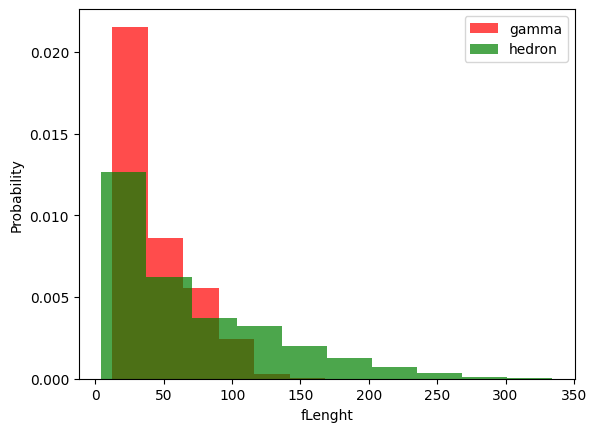

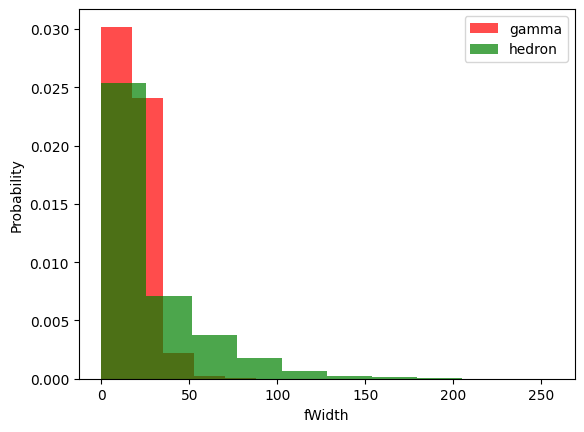

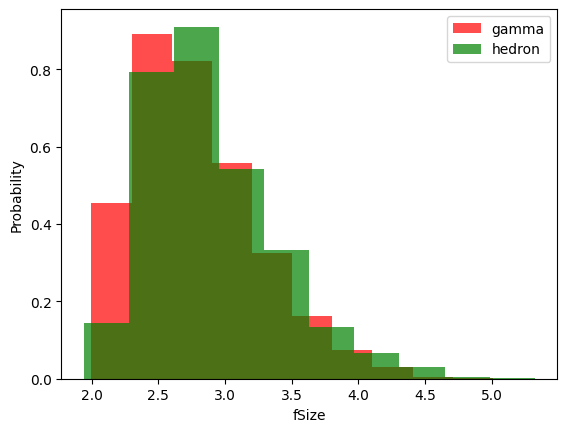

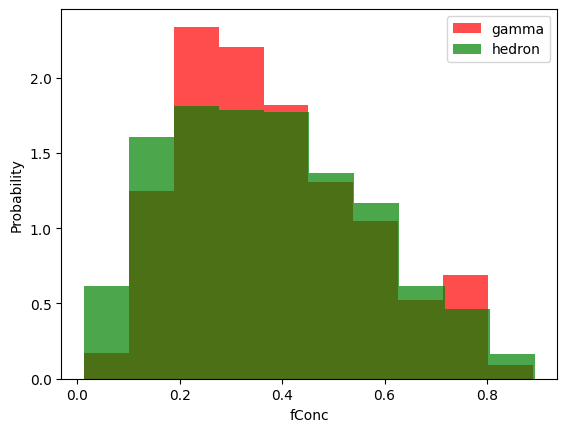

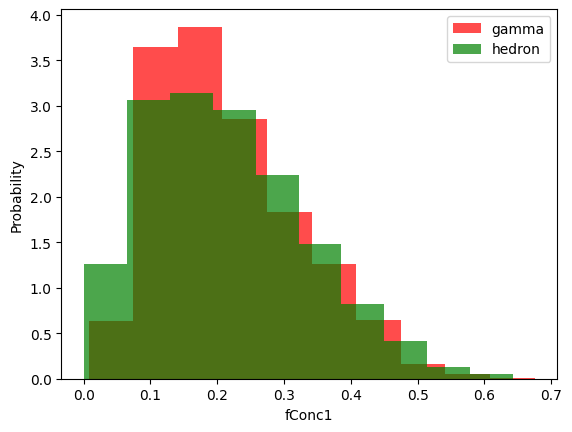

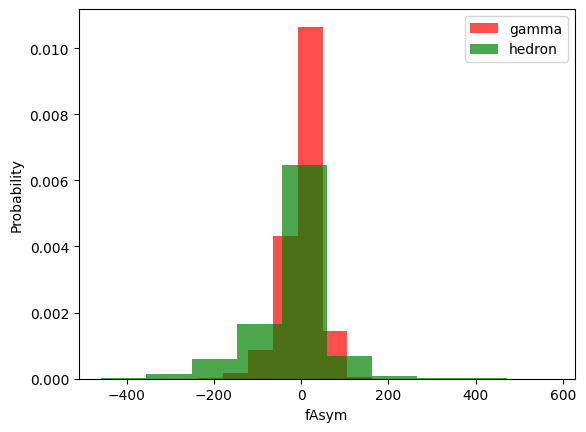

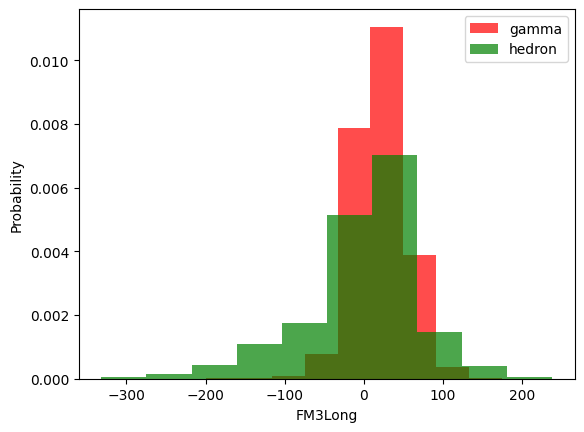

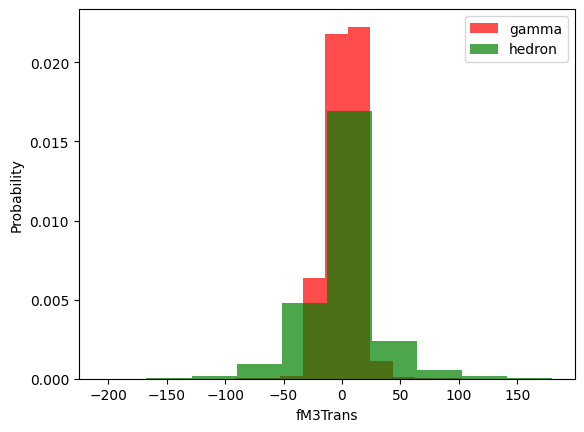

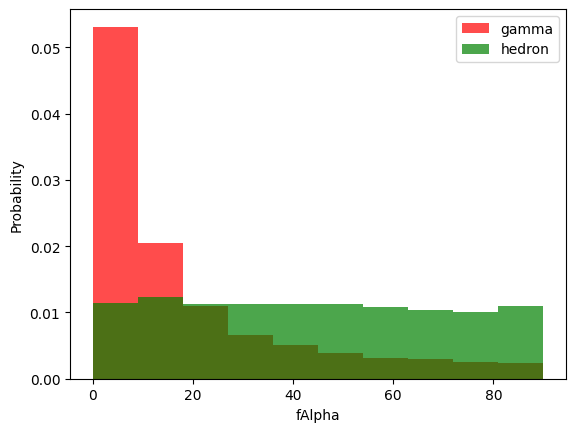

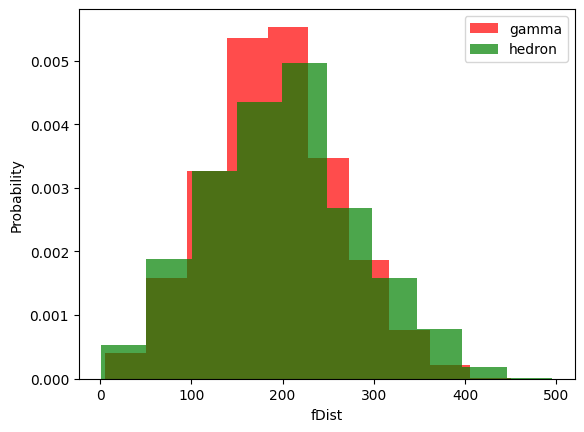

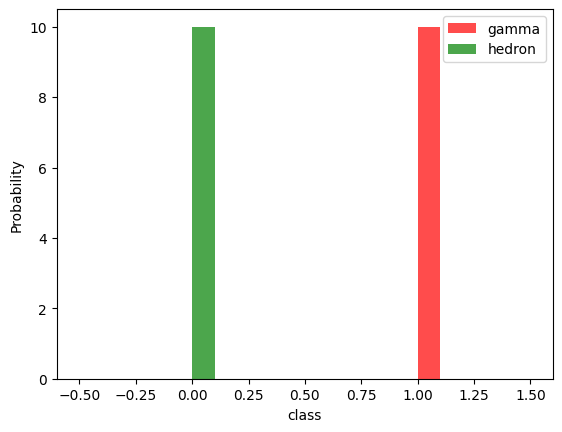

In [46]:
for label in df[:-1]:
    plt.hist(df[df["class"]==1][label],color='red',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='green',label='hedron',alpha=0.7,density=True)
    plt.legend()
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.show()

In [47]:
train , valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/Users/pavan/Code/ml/ml/ml_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [48]:
train.head()

fLenght   fWidth   fSize   fConc  fConc1    fAsym  FM3Long  fM3Trans  \
13733  16.7578  10.9846  2.5832  0.6371  0.3930  -2.1684   5.9657    7.8156   
2126   65.7368  32.8299  3.3320  0.1364  0.0710  83.0276  49.2726  -24.2423   
4494   27.6963  12.8710  2.6091  0.4182  0.2103  14.9777   6.8249    6.8491   
14184  33.2179  17.2895  2.5063  0.3848  0.2086  30.3863   3.5910  -24.2987   
898    19.0891  16.0585  2.9287  0.4985  0.3659   0.1031  14.3193   -7.1731   

        fAlpha     fDist  class  
13733  88.4385  258.1000      0  
2126   11.6143  153.8250      1  
4494    8.7213  149.9540      1  
14184  42.1742  210.5265      0  
898    22.7320  181.2720      1

In [49]:
def dataset_scale(dataframe,oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    Scaler = StandardScaler()
    x = Scaler.fit_transform(x)
    ROS = RandomOverSampler()
    x,y = ROS.fit_resample(x,y)
    data = np.hstack((x,np.reshape(y,(-1,1))))
    return data,x,y

In [50]:
train,x_train,y_train = dataset_scale(train,oversample=True)
valid,x_valid,y_valid = dataset_scale(valid,oversample=True)
test ,x_test,y_test = dataset_scale(test,oversample=True)


# KNN - K-nearest neighbours A very simple issue where we base our model on euclidian formula


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred = knn_model.predict(x_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      2433
           1       0.74      0.86      0.80      2433

    accuracy                           0.78      4866
   macro avg       0.79      0.78      0.78      4866
weighted avg       0.79      0.78      0.78      4866



# NAIVE BAYES - conditional probability and bayes rule

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [57]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.40      0.54      2433
           1       0.60      0.91      0.73      2433

    accuracy                           0.66      4866
   macro avg       0.71      0.66      0.63      4866
weighted avg       0.71      0.66      0.63      4866



# LOGISTIC REGRESSION - Remeber in physics lab, we used to plot in graphs
Sigmoid Function S(x) = 1/(1+e^(-x))

We try to fit data into the sigmoid function

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [60]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2433
           1       0.75      0.83      0.79      2433

    accuracy                           0.77      4866
   macro avg       0.78      0.77      0.77      4866
weighted avg       0.78      0.77      0.77      4866



# Support Vector Machines (SVM)
Best divider in the plot to provide distinguish data 

Margin, the boundary in between, should be large, the lines that are drawn through support vector

if Outlier are present then this model may fail,

if we have linear plot, we can use SVMs by changing there behavior, Kernel trick(x->(x,x^2))

Research More if intereseted

In [61]:
from sklearn.svm import SVC


In [62]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)


In [63]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2433
           1       0.80      0.89      0.85      2433

    accuracy                           0.84      4866
   macro avg       0.84      0.84      0.84      4866
weighted avg       0.84      0.84      0.84      4866



# Neural Networks


Input - > Neuron->bias -> activation Funciton -> output

Input -> weighted -> summation -> activation functin -> output
Without the activation function the neural model would be an linear model

Activation Funciton : Examples : Sigmoid, Tanh, RELU

Withthis Activation Function the output from an neuron is not just linear modle anymore

## BACKpropagation
Let us take L2 loss function : using Gradient descent, we can achivd the loss fuction to be near zero

W(0,new) = W(0,old) + alpha*abs -> alpha tells take a small step

alpha is the learning rate, which decides the speed of our neural network

# ML libraries
Because we cannot create them from scratch , hence use tensor flow
 

In [64]:
import tensorflow as tf

In [1]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid(True)
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()


In [2]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr , batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),  # 10 features as input
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    history = nn_model.fit(
     x_train,y_train,     
    epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


/Users/pavan/Code/ml/ml/ml_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


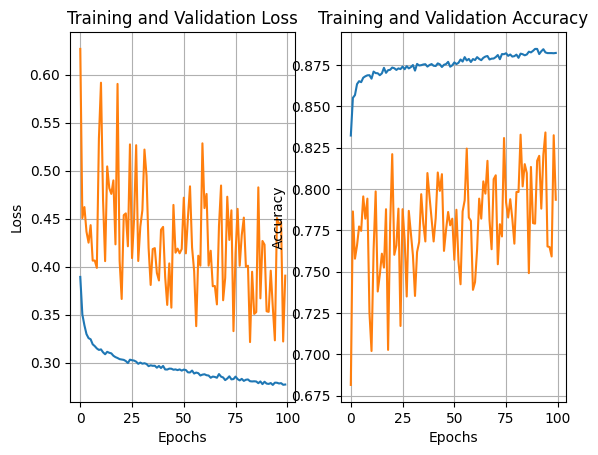

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8572 - loss: 0.3428
16 nodes, dropout 0, lr 0.01, batch_size 64


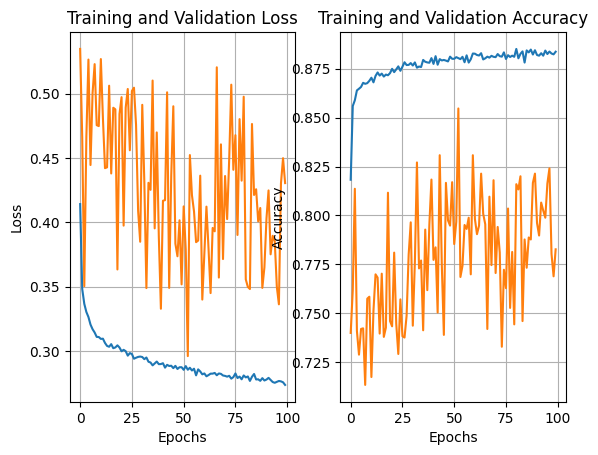

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8696 - loss: 0.3353
16 nodes, dropout 0, lr 0.01, batch_size 128


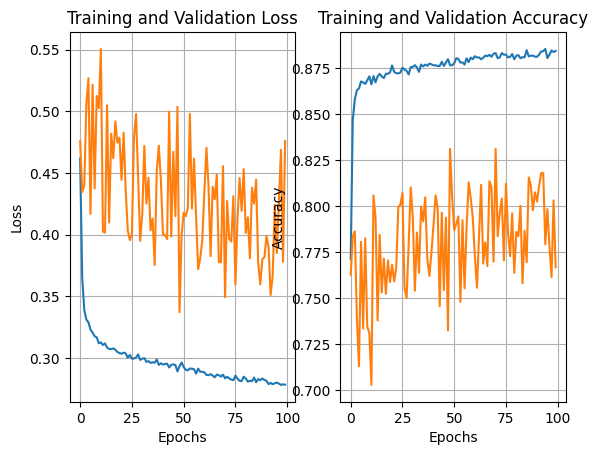

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8595 - loss: 0.3434
16 nodes, dropout 0, lr 0.05, batch_size 32


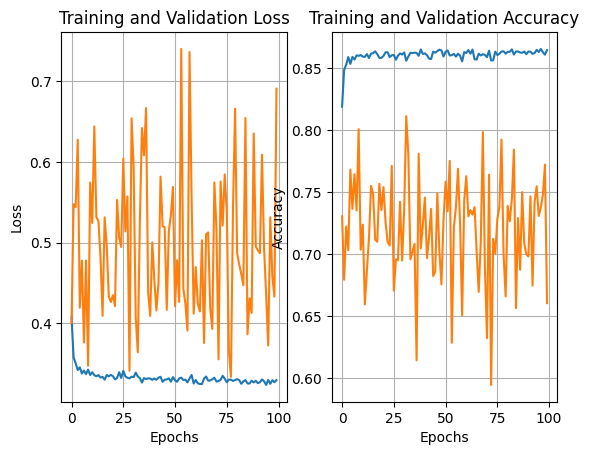

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8504 - loss: 0.3732
16 nodes, dropout 0, lr 0.05, batch_size 64


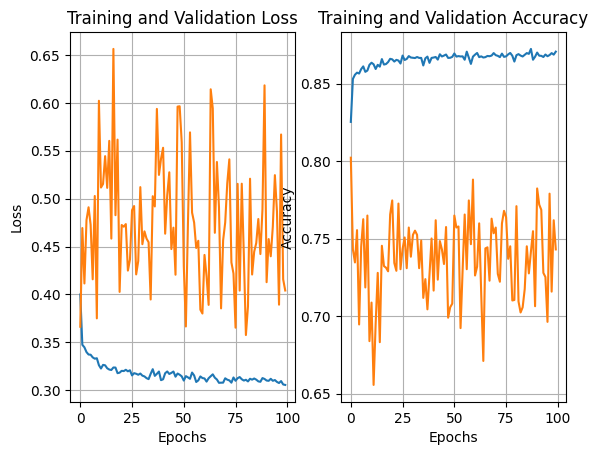

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.8587 - loss: 0.3276
16 nodes, dropout 0, lr 0.05, batch_size 128


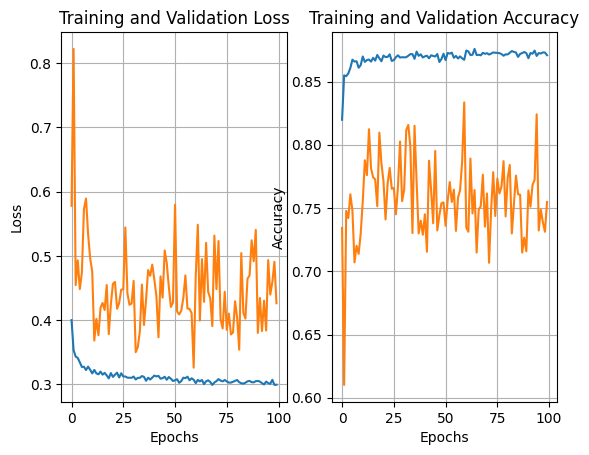

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8586 - loss: 0.3242
16 nodes, dropout 0, lr 0.001, batch_size 32


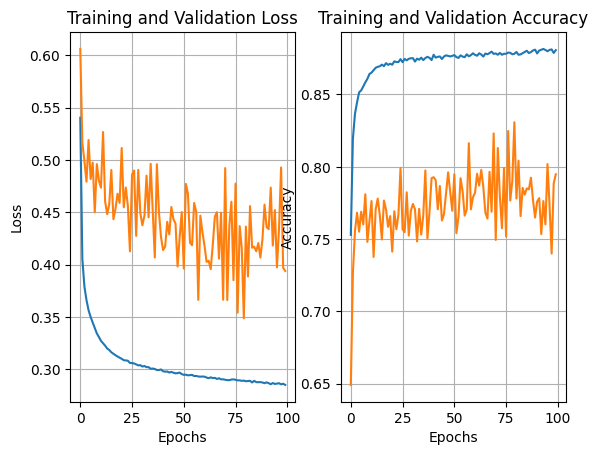

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.8628 - loss: 0.3303
16 nodes, dropout 0, lr 0.001, batch_size 64


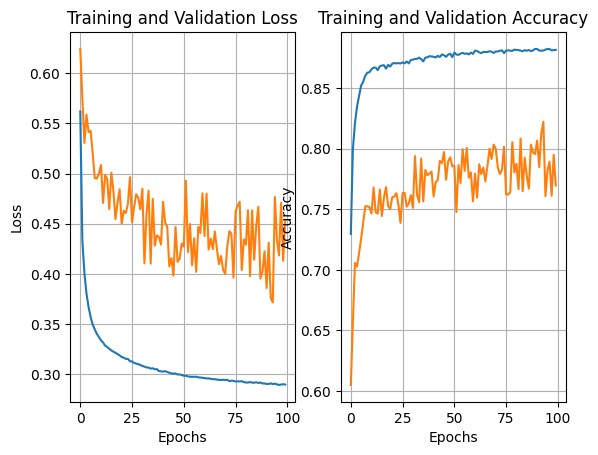

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.8629 - loss: 0.3271
16 nodes, dropout 0, lr 0.001, batch_size 128


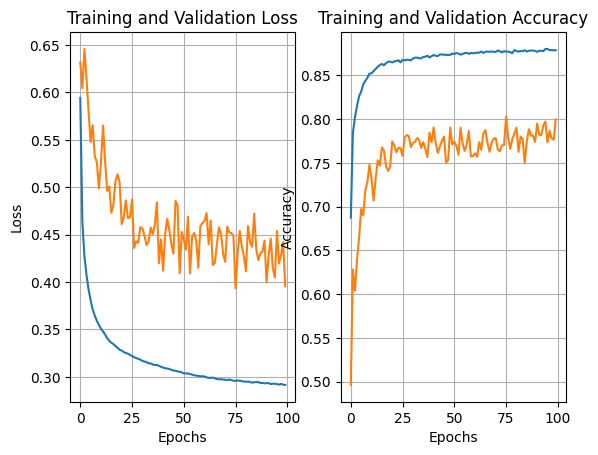

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.8571 - loss: 0.3198
16 nodes, dropout 0.2, lr 0.01, batch_size 32


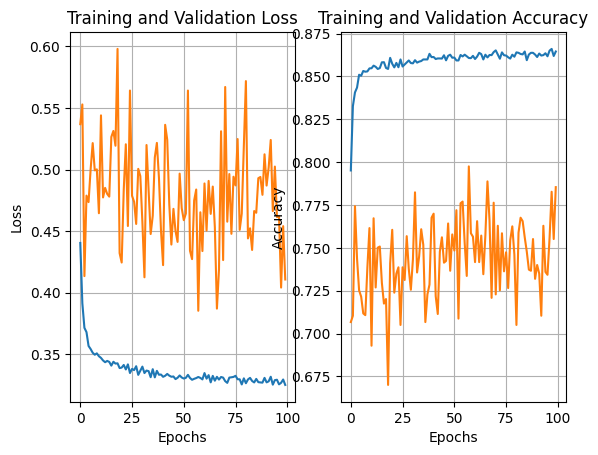

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8610 - loss: 0.3334
16 nodes, dropout 0.2, lr 0.01, batch_size 64


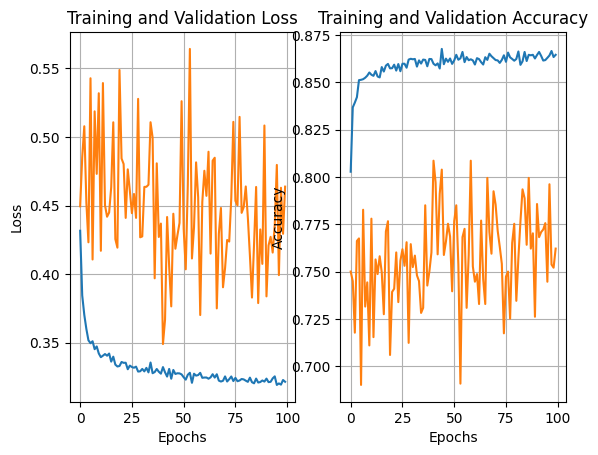

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8609 - loss: 0.3286
16 nodes, dropout 0.2, lr 0.01, batch_size 128


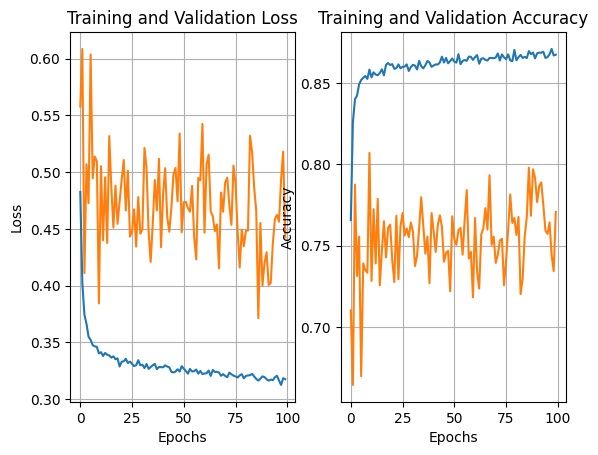

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.8756 - loss: 0.3187
16 nodes, dropout 0.2, lr 0.05, batch_size 32


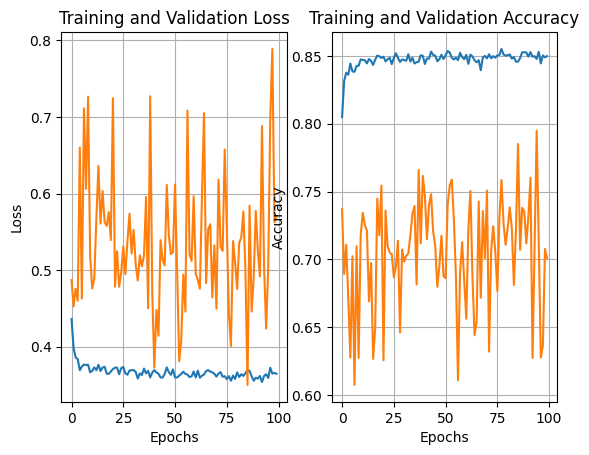

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8611 - loss: 0.3451
16 nodes, dropout 0.2, lr 0.05, batch_size 64


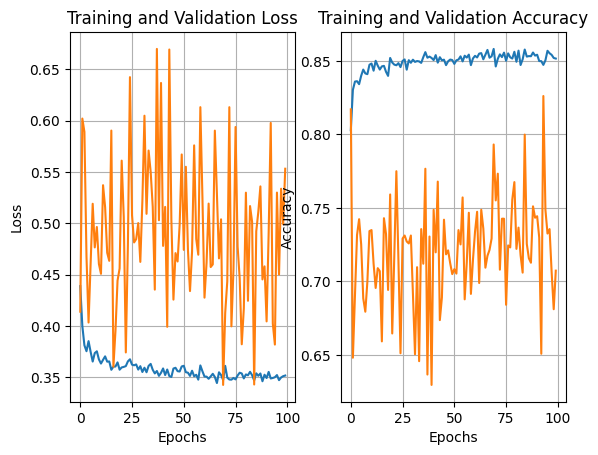

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8587 - loss: 0.3392
16 nodes, dropout 0.2, lr 0.05, batch_size 128


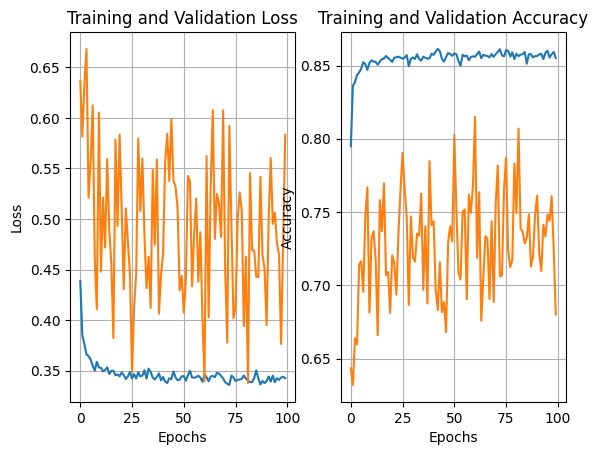

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8587 - loss: 0.3407
16 nodes, dropout 0.2, lr 0.001, batch_size 32


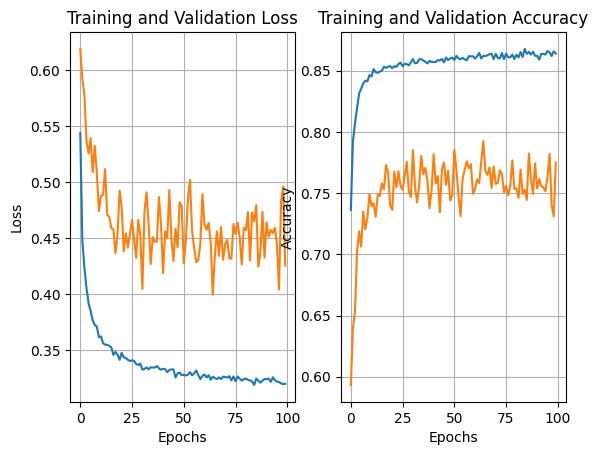

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8639 - loss: 0.3228
16 nodes, dropout 0.2, lr 0.001, batch_size 64


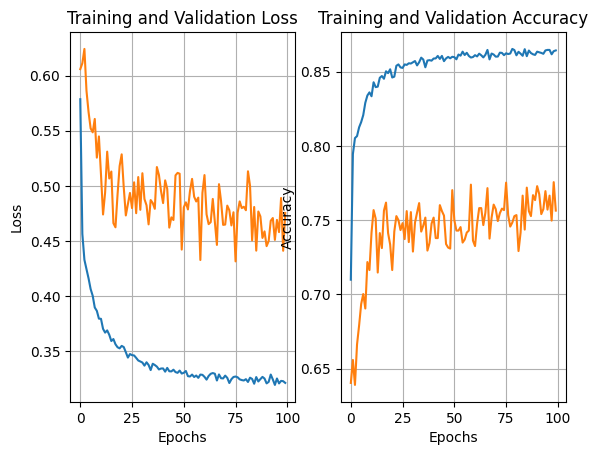

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8673 - loss: 0.3242
16 nodes, dropout 0.2, lr 0.001, batch_size 128


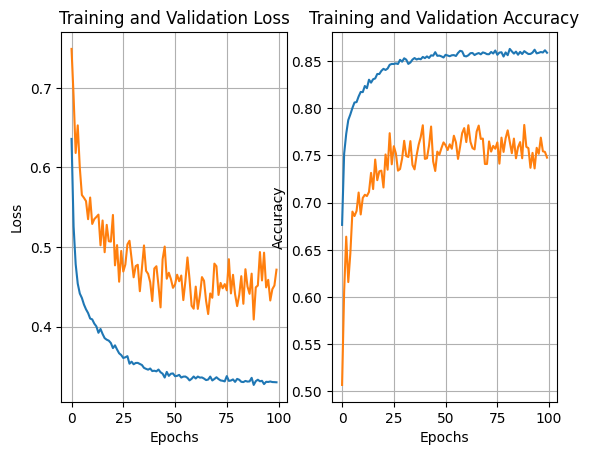

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8659 - loss: 0.3259
32 nodes, dropout 0, lr 0.01, batch_size 32


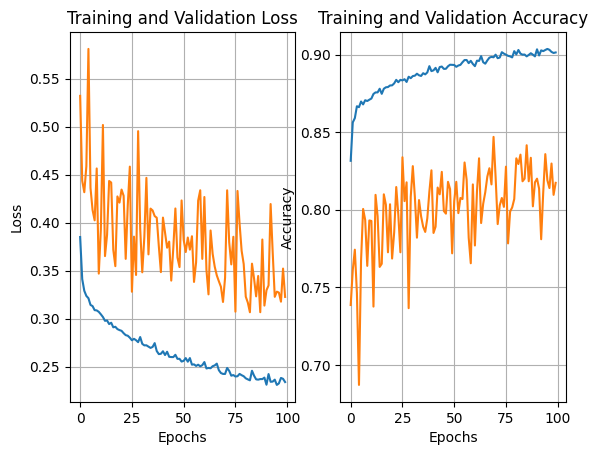

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8587 - loss: 0.3978
32 nodes, dropout 0, lr 0.01, batch_size 64


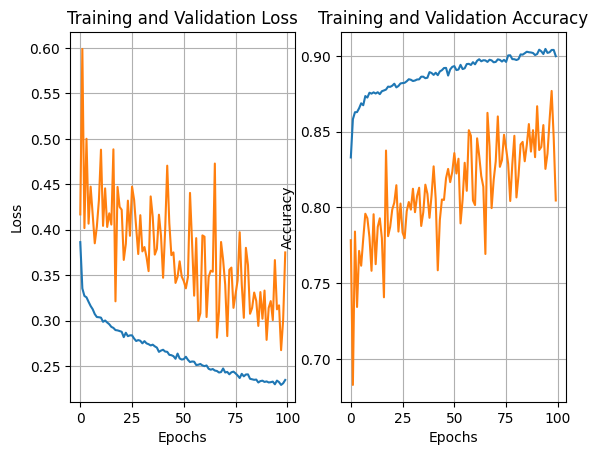

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8692 - loss: 0.3993
32 nodes, dropout 0, lr 0.01, batch_size 128


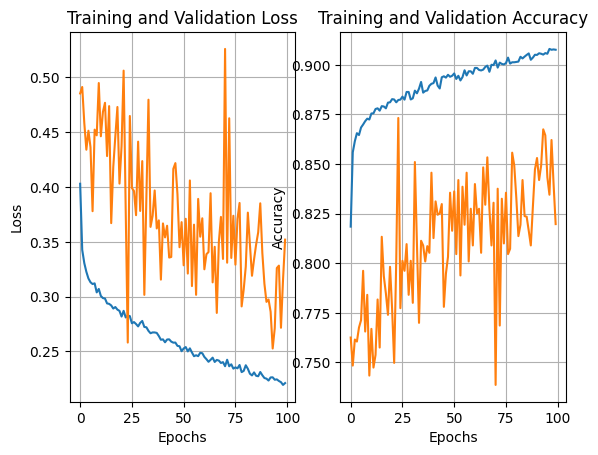

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8538 - loss: 0.4176
32 nodes, dropout 0, lr 0.05, batch_size 32


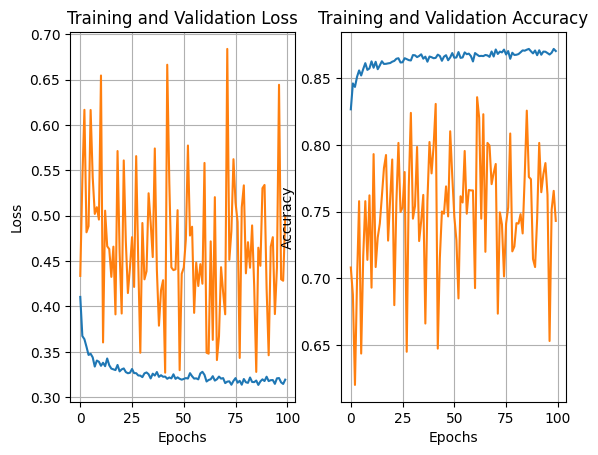

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8565 - loss: 0.3449
32 nodes, dropout 0, lr 0.05, batch_size 64


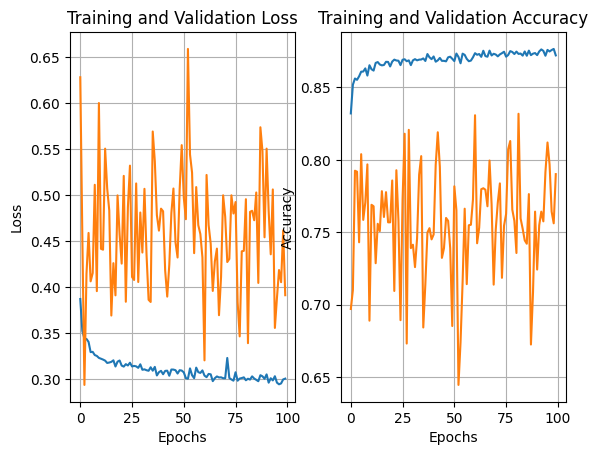

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.8497 - loss: 0.3590
32 nodes, dropout 0, lr 0.05, batch_size 128


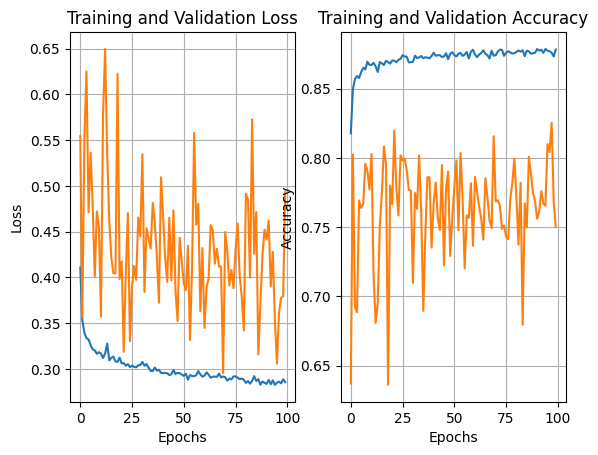

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8654 - loss: 0.3784
32 nodes, dropout 0, lr 0.001, batch_size 32


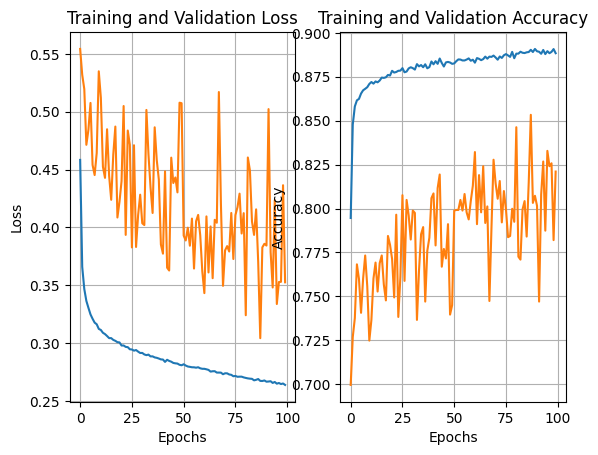

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8559 - loss: 0.3309
32 nodes, dropout 0, lr 0.001, batch_size 64


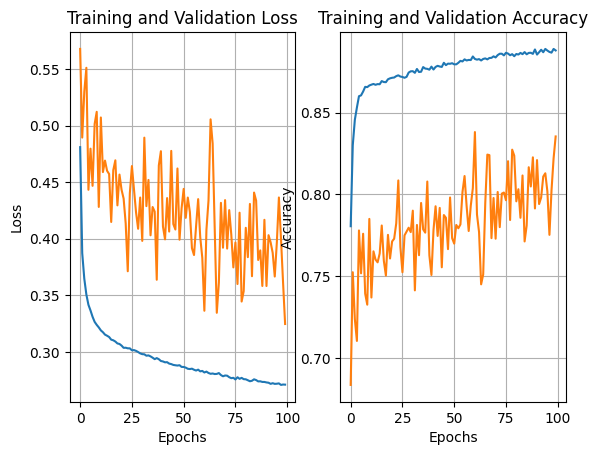

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8558 - loss: 0.3260
32 nodes, dropout 0, lr 0.001, batch_size 128


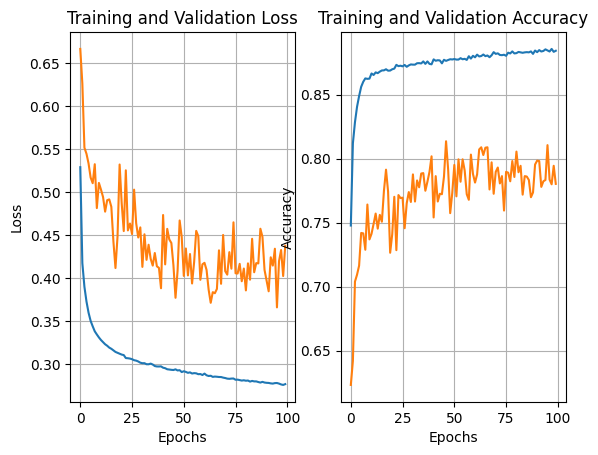

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8588 - loss: 0.3304
32 nodes, dropout 0.2, lr 0.01, batch_size 32


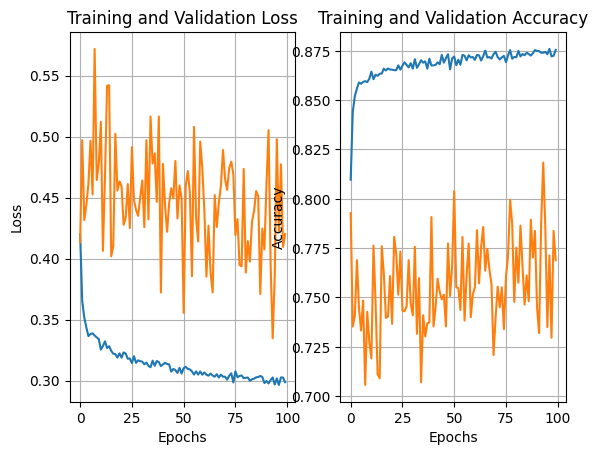

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.8734 - loss: 0.3183
32 nodes, dropout 0.2, lr 0.01, batch_size 64


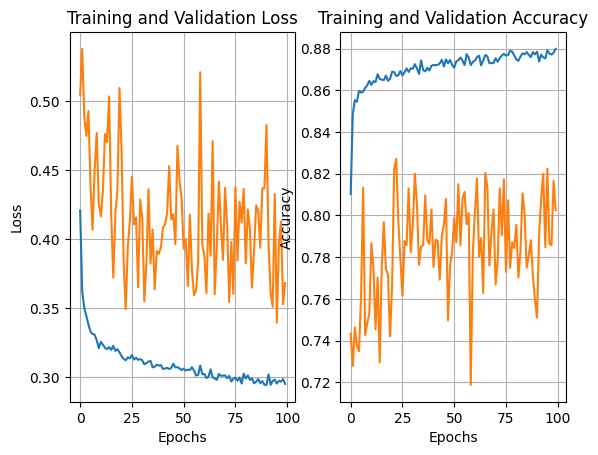

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8720 - loss: 0.3180
32 nodes, dropout 0.2, lr 0.01, batch_size 128


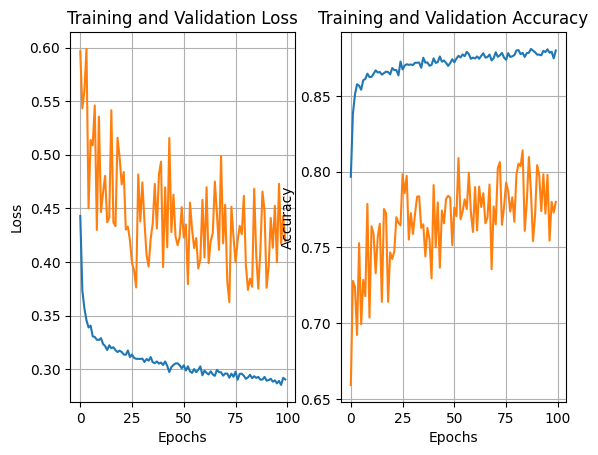

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.8627 - loss: 0.3210
32 nodes, dropout 0.2, lr 0.05, batch_size 32


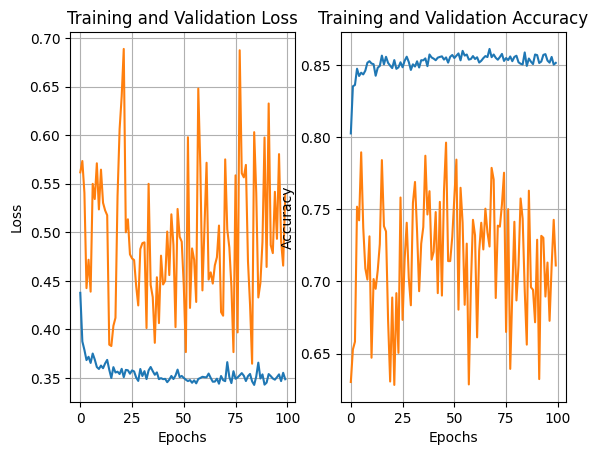

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8609 - loss: 0.3388
32 nodes, dropout 0.2, lr 0.05, batch_size 64


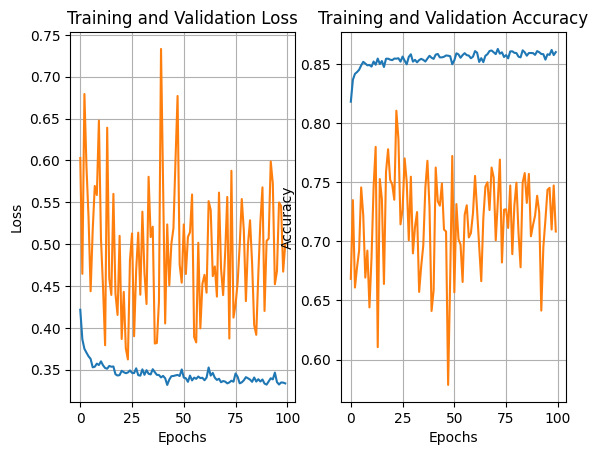

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8601 - loss: 0.3410
32 nodes, dropout 0.2, lr 0.05, batch_size 128


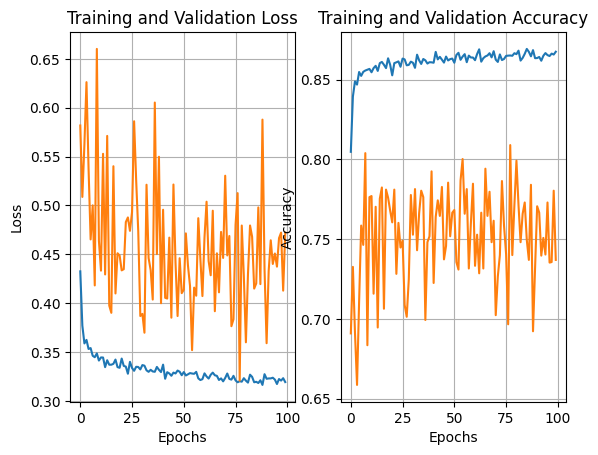

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.8629 - loss: 0.3235
32 nodes, dropout 0.2, lr 0.001, batch_size 32


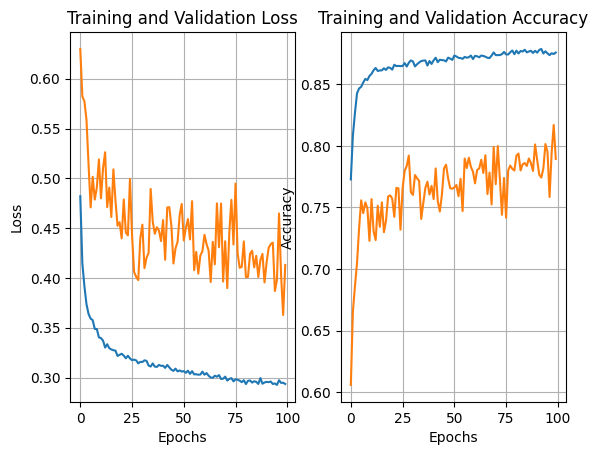

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.8704 - loss: 0.3174
32 nodes, dropout 0.2, lr 0.001, batch_size 64


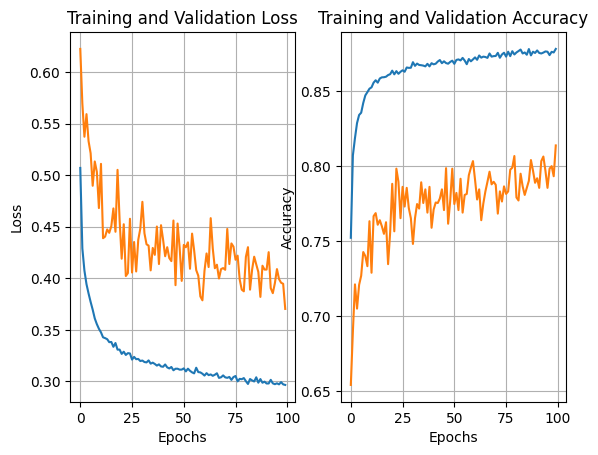

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.8632 - loss: 0.3191
32 nodes, dropout 0.2, lr 0.001, batch_size 128


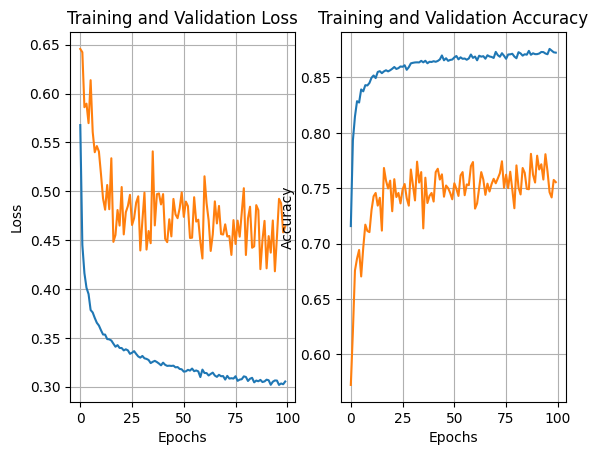

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8683 - loss: 0.3165
64 nodes, dropout 0, lr 0.01, batch_size 32


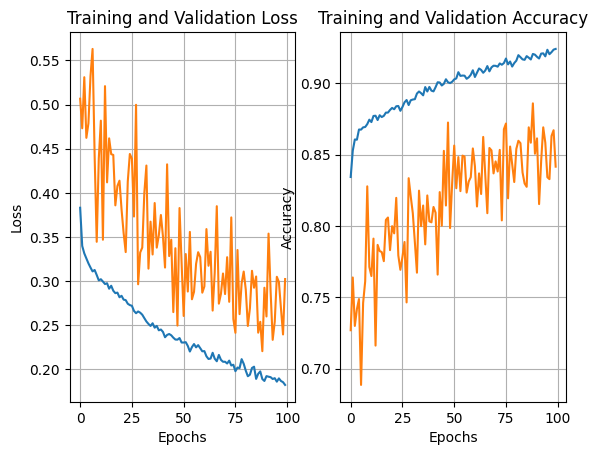

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.8564 - loss: 0.5409
64 nodes, dropout 0, lr 0.01, batch_size 64


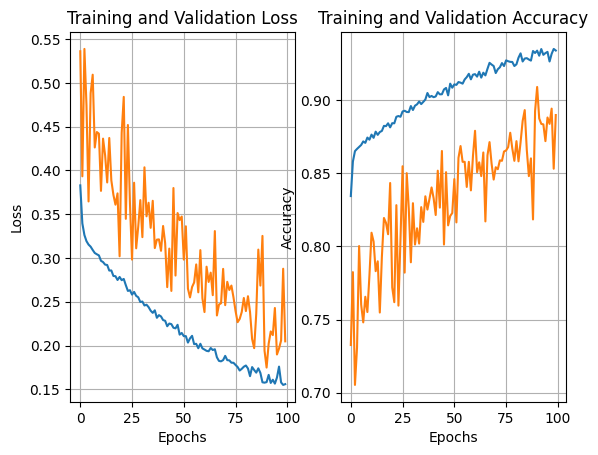

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8562 - loss: 0.6684
64 nodes, dropout 0, lr 0.01, batch_size 128


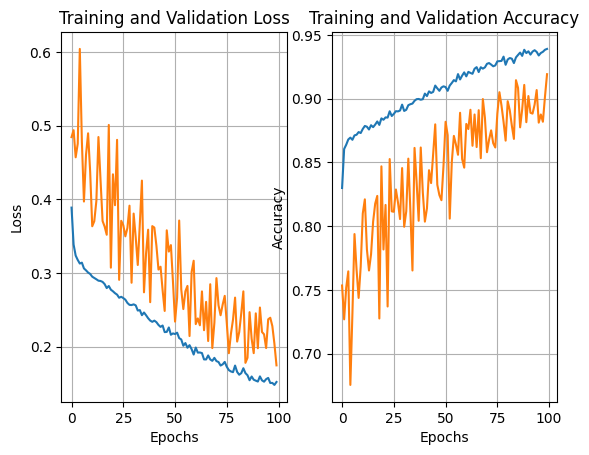

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.8470 - loss: 0.6417
64 nodes, dropout 0, lr 0.05, batch_size 32


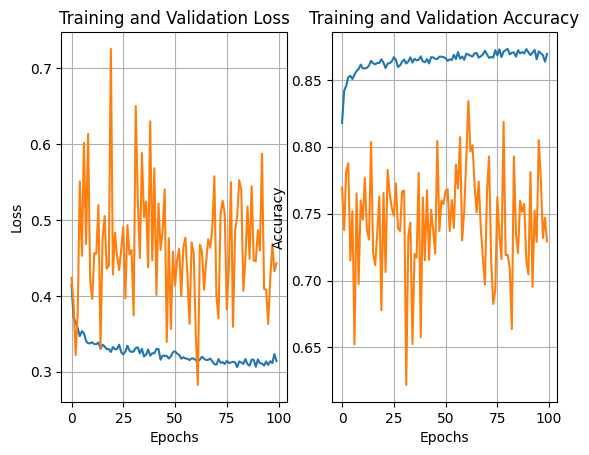

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.8570 - loss: 0.3442
64 nodes, dropout 0, lr 0.05, batch_size 64


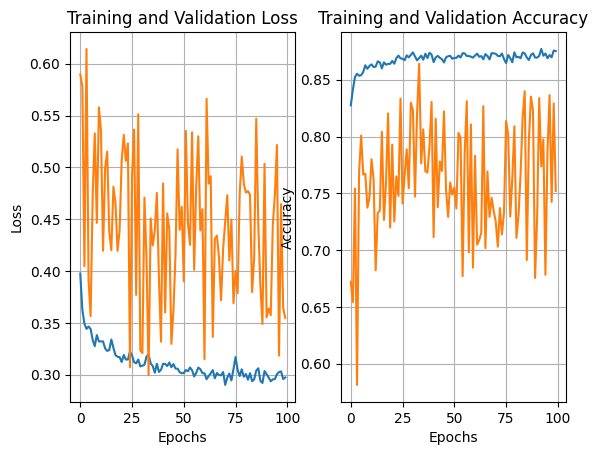

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8658 - loss: 0.3546
64 nodes, dropout 0, lr 0.05, batch_size 128


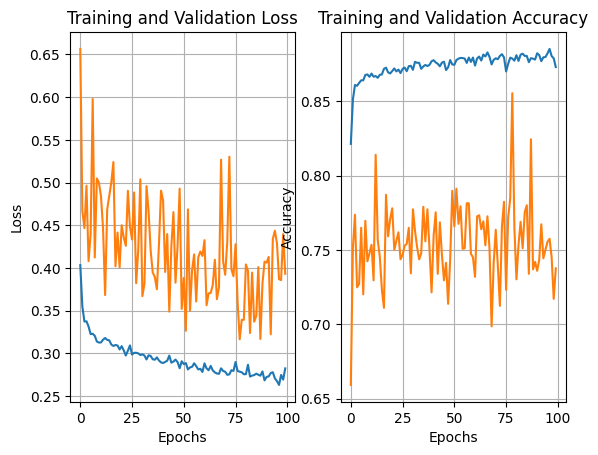

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8507 - loss: 0.3987
64 nodes, dropout 0, lr 0.001, batch_size 32


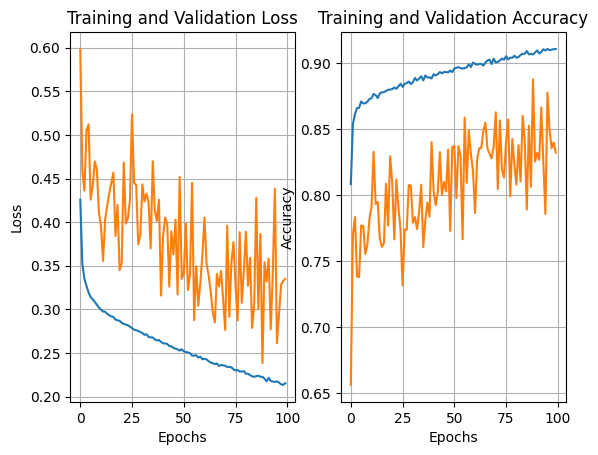

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8602 - loss: 0.3567
64 nodes, dropout 0, lr 0.001, batch_size 64


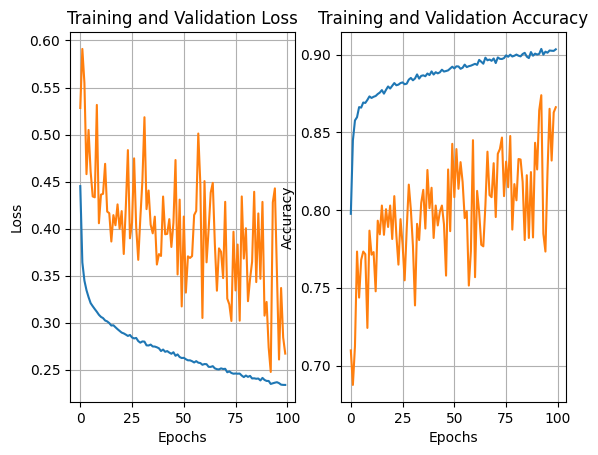

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8596 - loss: 0.3367
64 nodes, dropout 0, lr 0.001, batch_size 128


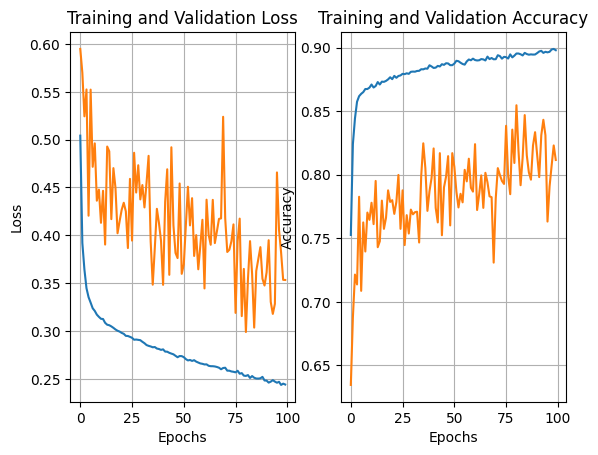

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8671 - loss: 0.3211
64 nodes, dropout 0.2, lr 0.01, batch_size 32


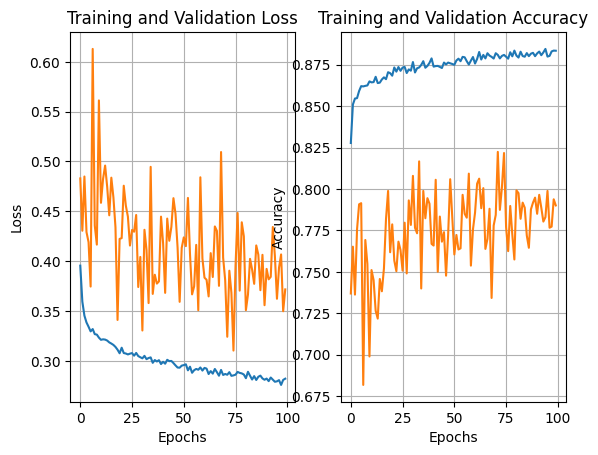

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8691 - loss: 0.3166
64 nodes, dropout 0.2, lr 0.01, batch_size 64


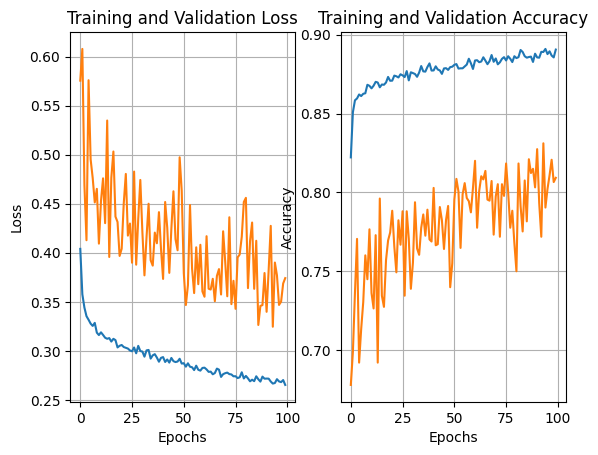

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8719 - loss: 0.3256
64 nodes, dropout 0.2, lr 0.01, batch_size 128


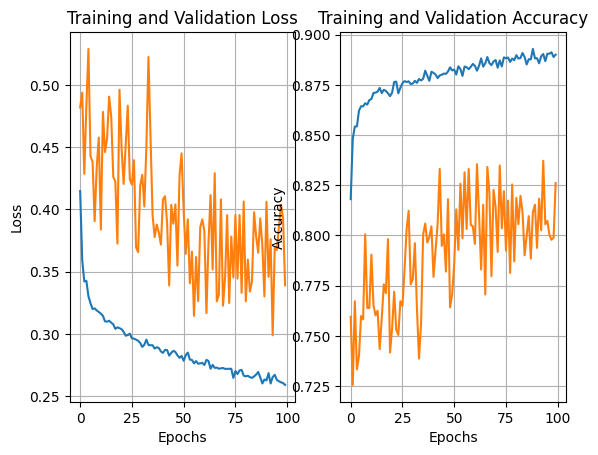

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8663 - loss: 0.3345
64 nodes, dropout 0.2, lr 0.05, batch_size 32


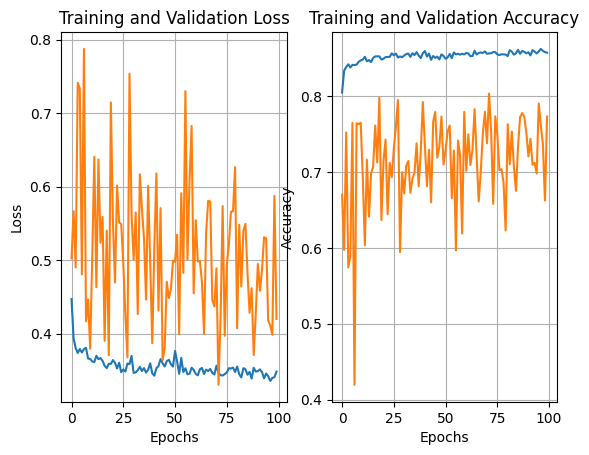

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8528 - loss: 0.3454
64 nodes, dropout 0.2, lr 0.05, batch_size 64


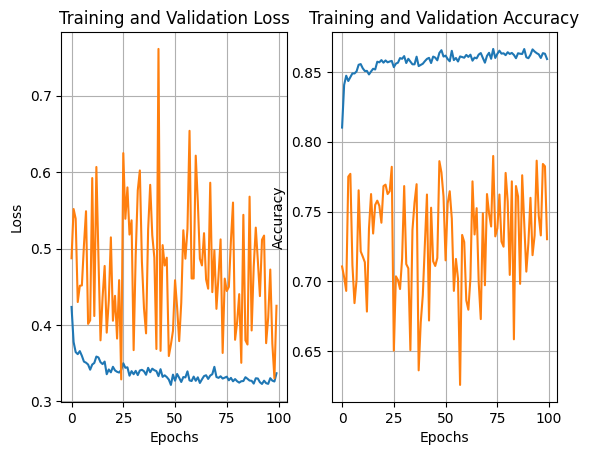

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8515 - loss: 0.3386
64 nodes, dropout 0.2, lr 0.05, batch_size 128


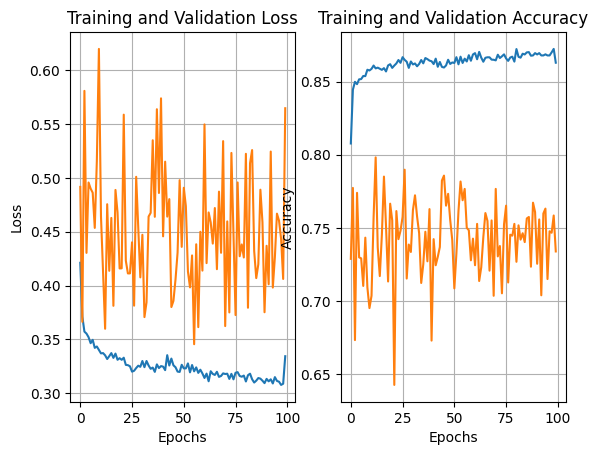

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8650 - loss: 0.3587
64 nodes, dropout 0.2, lr 0.001, batch_size 32


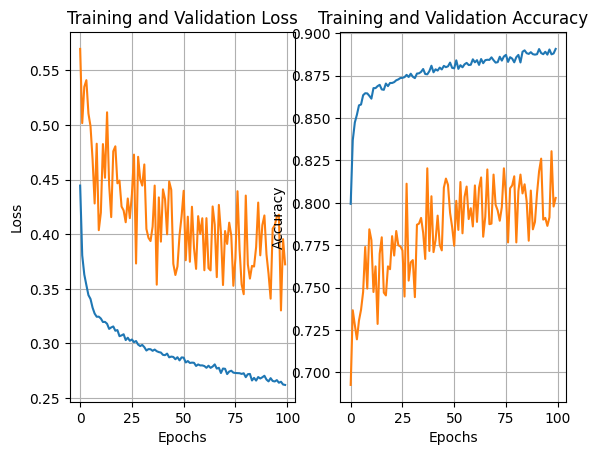

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8718 - loss: 0.3143
64 nodes, dropout 0.2, lr 0.001, batch_size 64


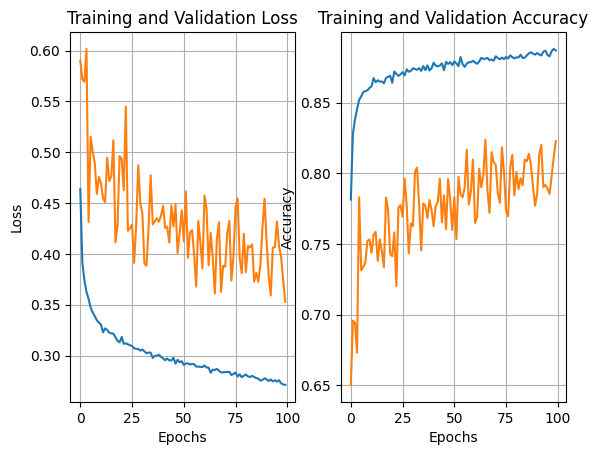

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8646 - loss: 0.3150
64 nodes, dropout 0.2, lr 0.001, batch_size 128


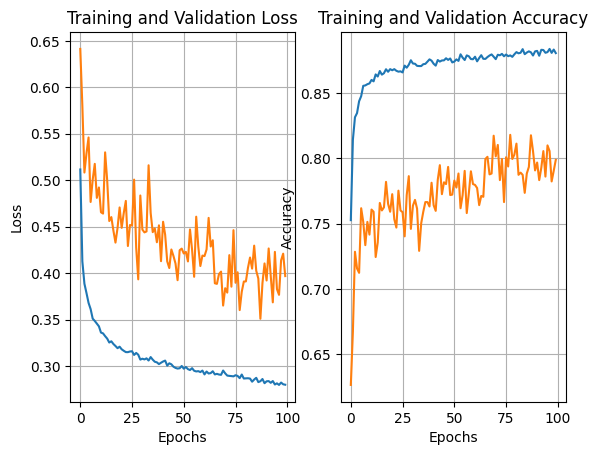

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.8725 - loss: 0.3106


In [67]:
epochs=100
least_val_loss = float('inf')
least_loss_model = None
for num_nodes in [16 , 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.05, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model , history = train_model(x_train,y_train,num_nodes,dropout_prob,lr , batch_size, epochs)
                plot_history(history)
                val_loss, _ = model.evaluate(x_valid,y_valid)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [71]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2433
           1       0.78      0.94      0.85      2433

    accuracy                           0.84      4866
   macro avg       0.85      0.84      0.84      4866
weighted avg       0.85      0.84      0.84      4866



# Linear Regression
line of best fit, this is the regeression done in physics class. The big formulas

The data type should follow linearity and Independence of data types
homoskedacity 

Refer the notes on Joplin/ml

Normaility  - The residuals should follow a along the mean line 

Homoskedacity - the samples along the line of mean , spread should be same

1) Mean Absolute error (MAE)
2) Mean Squared error (MSE)
3) Root mean squared error(RMSE)
4) R^2 - coefficent of determination
   